# Predictive Analytics for Daily Guest Counts

## Phase 1 Proposal

### Domain Understanding

For the domain understanding part of this project, I used my experience working at Tortillas since the summer of 2022. I've learned a lot about how restaurants work during this time. Also, because Tortillas is in a busy restaurant area, I know a lot about what happens in the neighborhood. I can easily talk to other restaurant workers to learn more. My boss at Tortillas also gave me some good ideas about what might affect how many guests we have, like PSV matches or Effenaar concerts. This helped me figure out what to look for when predicting guest numbers.

### Data Sourcing

For data sourcing, I initially consulted with my boss at Tortillas to explore potential sources of data for my project. Unfortunately, the available data was limited. After two weeks of waiting, I received only the order deliveries data, which did not include sales data, essential for my intended analysis. Additionally, the order deliveries were aggregated on a weekly basis, making it challenging to make daily predictions accurately. The assumption that all purchases for the week corresponded to sales for that same week was not ideal, as sales could fluctuate daily. Furthermore, due to ethical and privacy concerns, accessing additional data, such as financial records, was not possible.

Despite these limitations, I realized that I could readily access data on the number of guests visiting Tortillas each day. While this dataset alone may seem insufficient, I recognized the potential to enrich it by incorporating external factors known to influence guest numbers. Factors such as weather conditions, local events, holidays, and special occasions could significantly impact restaurant traffic. With access to this data, I could enhance the complexity of my dataset and improve the accuracy of my predictive model.

#### Objectives and Target Audience

The primary objective of my project is to predict the number of guests visiting Tortillas restaurant each day. By doing so, I aim to assist restaurant management in making informed decisions regarding staffing levels, inventory management, and overall business strategy. The target audience for this project includes restaurant owners, managers, and staff who rely on accurate forecasts to optimize daily operations.

#### Data Characteristics

To achieve our objectives, I require structured data detailing the number of guests visiting Tortillas each day, preferably over a significant historical period to establish trends and patterns. Additionally, I will need unstructured data on external factors such as weather conditions, local events, and holidays. These datasets will provide the necessary context to enhance the predictive capabilities of our model.

#### Data Sources

The data on the number of guests visiting Tortillas each day can be sourced directly from the restaurant's records, provided by my boss. For external factors such as weather conditions and local events, I will need to search the internet or reach out to relevant organizations and authorities for accurate and up-to-date information. This may involve accessing public databases, APIs, or creating an own dataset collecting information from the calendar.

#### Version Control

To maintain version control for my data, I plan to start with a dataset spanning three months of historical guest counts and external factors. As I clean, preprocess, and augment the data, I will maintain a clear version history to ensure reproducibility and scalability. If the initial model proves successful, I will consider expanding the dataset and implementing more advanced version control practices to manage ongoing updates and improvements.

### Analytic Approach

In this phase, a specific goal and approach for the project are defined, focusing on predicting the number of guests visiting the restaurant. The objective is to determine the target variable, understand the nature of the problem, and identify key indicators within the dataset to facilitate accurate predictions.

#### 🎯 Target Variable:

The target variable for the predictive model is the number of guests visiting the restaurant on a given day. This variable represents the "thing" aimed to be predicted based on other features in the dataset. By forecasting the daily guest count, assistance can be provided to restaurant management in optimizing staffing levels, inventory management, and overall business strategy.

#### 🎨 Nature of the Problem:

The nature of the target variable determines the type of algorithm suitable for the predictive analytics model. In this case, it involves a regression problem as the aim is to predict a continuous numerical value – the daily guest count. Regression algorithms are well-suited for such problems as they can effectively estimate the relationship between input features and the target variable to make predictions.

#### 📍 Good Indicators:

To identify good indicators for predicting the daily guest count, exploratory data analysis (EDA) is conducted to uncover correlations between the target variable and other features in the dataset. By calculating correlation coefficients, the strength and direction of relationships between variables can be determined. Features exhibiting strong correlations with the number of guests serve as valuable indicators for the predictive model.

## Phase 2 Provisioning

### Data Requirements

For the Tortillas project, I use several datasets to add more features. These datasets include:

Guest Counts:
A dataset containing daily guest counts for Tortillas serves as the primary input. This data reveals the restaurant's foot traffic over time, essential for prediction.

Weather data:
Weather data are important for the tortillas industry, especially temperature and precipitation. These factors greatly influence consumer behavior and restaurants. Although temperature and precipitation are believed to have the most important effects, we will consider other climate variables to examine relationships and improve forecasts.

Effenaar Agenda:
An Effenaar agenda dataset lists upcoming events and concerts, including artist, venue, and date/time details. This dataset allows consideration of local events' impact on restaurant attendance.

PSV Matches:
Information about PSV matches, indicating home or away games and match types (e.g., Eredivisie, Champions League), is included. Sporting events draw crowds to the area, affecting restaurant traffic.

Other:
Consideration of additional factors affecting restaurant attendance, such as holidays, local festivals, promotions, or community events, is imperative. While these data may not be readily accessible, it is essential to explore avenues for integrating relevant information into the analysis.

#### Data dictionary

| Data Element Name | Data Type  | Units        | Range      | Description                        | Source             | Quality Standards                             | Notes                            |
|-------------------|------------|--------------|------------|------------------------------------|--------------------|-----------------------------------------------|----------------------------------|
| Guest Counts      | Numerical  | Guests       | 0 to 250     | Daily count of restaurant guests   | Internal database  |                |                                  |
| Temperature       | Numerical  | Celsius (°C) | -10 to 35  | Temperature in degrees Celsius     | KNMI       |                 |                                  |
| Rain     | Numerical  | Millimeters  | 0 to ∞     | Amount of precipitation            | KNMI        |                    |
| Wind Speed        | Numerical  | Meters/second| 0 to 20     | Speed of wind                      |KNMI        |                  |                                  |
| Effenaar Agenda   | Categorical| N/A          | N/A        | Upcoming events at Effenaar        | Effenaar website   |                      |                                  |
| PSV Matches       | Categorical| N/A          | N/A        | PSV match information              | PSV website        |                         |                                  |
| Other Factors     | Categorical| N/A          | N/A        | Additional factors influencing attendance | Various sources |                     | Consider holidays, promotions, NS |


### Data Collection

In [225]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

#### Restaurant

The data was gathered directly from the restaurant using a system called [Formitable](https://formitable.com/en/). This platform allows me to effortlessly track the number of guests we've served each day. I then manually input this information into my Tortillas.xlsx file for record-keeping.

In [226]:
# Read the data
dfTortillas = pd.read_excel("Tortillas.xlsx")
dfTortillas.head()

,Date,Day,Season,Total guests
0,2024-03-17,Sunday,Winter,50.0
1,2024-03-16,Saturday,Winter,71.0
2,2024-03-15,Friday,Winter,53.0
3,2024-03-14,Thursday,Winter,55.0
4,2024-03-13,Wednesday,Winter,11.0


Date: Represents the specific date, formatted as YYYY-MM-DD.

Day: Indicates the day of the week corresponding to the date.

Season: Type of season for the day.

Total guests: Refers to the total number of guests served on the corresponding date.

In [227]:
dfTortillas.describe()

,Date,Total guests
count,807,646.000000
mean,2023-02-08 00:00:00,42.992260
min,2022-01-01 00:00:00,0.000000
25%,2022-07-21 12:00:00,26.000000
50%,2023-02-08 00:00:00,38.000000
75%,2023-08-28 12:00:00,58.000000
max,2024-03-17 00:00:00,166.000000
std,NaN,24.605885


In [228]:
dfTortillas.dtypes

Date            datetime64[ns]
Day                     object
Season                  object
Total guests           float64
dtype: object

In [229]:
dfTortillas.shape

(807, 4)

#### Weather

The weather data was collected from the Royal Netherlands Meteorological Institute (KNMI). KNMI provides historical weather data, including temperature, precipitation, and wind speed, which are usefull factors for this analysis. The data was downloaded in a structured format, which allowed for easy integration into the existing dataset. This comprehensive weather data provides valuable insights into how weather conditions may influence the number of guests visiting the restaurant.

In [230]:
# Read the data
dfWeather = pd.read_csv("Weather.csv", sep=",")
dfWeather.head()

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,370,20220101,192,41,42,50,1,30,9,90,...,2,75,13,8,84,91,2,78,23,4
1,370,20220102,222,60,66,100,21,40,2,170,...,8,75,9,8,81,93,19,73,14,3
2,370,20220103,224,67,68,80,1,40,18,140,...,5,75,14,8,84,90,7,77,1,2
3,370,20220104,236,28,37,60,12,20,16,100,...,12,70,14,8,91,95,7,84,21,1
4,370,20220105,254,52,53,80,11,30,20,150,...,16,73,4,6,85,95,21,74,11,2


The weather dataset contains a wealth of information, including various meteorological factors. However, for the purpose of this analysis, we will focus on the features that are most likely to influence restaurant attendance. Specifically, we will consider the temperature, amount of rainfall, and wind speed. These factors are believed to have a significant impact on consumer behavior and, consequently, the number of guests visiting the restaurant.

In [231]:
dfWeather_selected = dfWeather[['YYYYMMDD', '   TX', '   RH', '   DR', '  RHX', ' RHXH', '   FG', ' FHXH']]

# Renaming columns for clarity
dfWeather_selected.columns = ['Date', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Timezone max rain', 'Wind', 'TImezone max wind']

# Assuming dfWeather_selected is your DataFrame with the 'Date' column
dfWeather_selected['Date'] = pd.to_datetime(dfWeather_selected['Date'], format='%Y%m%d')

# Converting temperature from 0.1 degrees Celsius to degrees Celsius
dfWeather_selected.loc[:, 'Temperature'] = dfWeather_selected['Temperature']
dfWeather_selected["Temperature"] *= 0.1

# Converting rain from 0.1 mm to mm
dfWeather_selected.loc[:, 'Rain'] = dfWeather_selected['Rain']
dfWeather_selected["Rain"] *= 0.1

# Converting duration rain from 0.1 hours to hours
dfWeather_selected.loc[:, 'Duration rain'] = dfWeather_selected['Duration rain']
dfWeather_selected["Duration rain"] *= 0.1

# Converting max rain from 0.1 mm to mm
dfWeather_selected.loc[:, 'Max rain'] = dfWeather_selected['Max rain']
dfWeather_selected["Max rain"] *= 0.1

dfWeather_selected.loc[:, 'Timezone max rain'] = dfWeather_selected['Timezone max rain']

# Converting wind from 0.1 m/s to m/s
dfWeather_selected.loc[:, 'Wind'] = dfWeather_selected['Wind']
dfWeather_selected["Wind"] *= 0.1

dfWeather_selected.head()

,Date,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,TImezone max wind
0,2022-01-01,14.4,0.0,0.0,0.0,1,4.2,1
1,2022-01-02,13.7,2.7,4.8,0.6,19,6.6,21
2,2022-01-03,11.1,0.5,0.4,0.4,7,6.8,1
3,2022-01-04,8.5,3.9,3.9,1.7,15,3.7,12
4,2022-01-05,6.2,3.3,2.8,2.0,19,5.3,11


Date = Date (YYYY=year MM=month DD=day)

Temperature = Maximum temperature (degrees Celsius). The restaurant operates on weekdays starting at 5 p.m. and on weekends around 2 p.m. Therefore, it is sensible to select the maximum temperature recorded for each respective day.

Rain = Daily precipitation amount (in mm) (-0.1 for <0.05 mm)

Duration rain = Precipitation duration (in 1 hour)

Max rain = Maximum hourly precipitation amount (in mm) (-0.1 for <0.05 mm)

Timezone max rain = Hourly division in which Max rain was measured

Wind = Daily mean windspeed (in m/s)

In [232]:
dfWeather_selected.describe()

,Date,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,TImezone max wind
count,805,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2023-02-07 00:00:00,15.979752,2.548447,1.965093,0.948199,6.744099,3.805839,10.961491
min,2022-01-01 00:00:00,-1.300000,-0.100000,0.000000,-0.100000,1.000000,0.800000,1.000000
25%,2022-07-21 00:00:00,10.400000,0.000000,0.000000,0.000000,1.000000,2.600000,8.000000
50%,2023-02-07 00:00:00,15.400000,0.000000,0.000000,0.000000,1.000000,3.500000,11.000000
75%,2023-08-27 00:00:00,22.100000,2.700000,2.600000,1.100000,13.000000,4.800000,14.000000
max,2024-03-15 00:00:00,38.300000,48.300000,20.800000,24.900000,24.000000,10.200000,24.000000
std,NaN,7.719364,5.443478,3.465313,2.076207,7.725651,1.765635,5.700856


In [233]:
dfWeather_selected.dtypes

Date                 datetime64[ns]
Temperature                 float64
Rain                        float64
Duration rain               float64
Max rain                    float64
Timezone max rain             int64
Wind                        float64
TImezone max wind             int64
dtype: object

In [234]:
dfWeather_selected.shape

(805, 8)

#### PSV

The PSV data was collected from the PSV fan [website](https://www.supver-psv.nl/nl/seizoen/wedstrijden.html) and then entered manually in a csv file.
For the seasons 2021/2022 and 2022/2023, I've used [this](https://www.psv.nl/match-center?season=2021-2022&toplevel=results&team=psv1) website

In [235]:
dfPsv = pd.read_csv("Psv.csv", sep=",", encoding="ISO-8859-1")
dfPsv.head()

,Date,Time,Type,Cancelled
0,2022-05-11,20:00,Eredivisie,0
1,2022-05-01,14:30,Eredivisie,0
2,2022-04-17,18:00,KNVB Beker,0
3,2022-04-14,18:45,Europa Conference League,0
4,2022-04-10,14:30,Eredivisie,0


Date: Represents the date on which the match was played, formatted as YYYY-MM-DD.

Time: Indicates the time at which the match started, typically in HH:MM format using the 24-hour clock.

Type: Specifies the type of match that took place, such as Eredivisie, KNVB Beker, or Champions League.

Cancelled: Denotes whether the match was cancelled or not, with 0 indicating that the match was not cancelled and 1 indicating that it was cancelled.

In [236]:
dfPsv.describe()

,Cancelled
count,66.000000
mean,0.015152
std,0.123091
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [237]:
dfPsv.dtypes

Date         object
Time         object
Type         object
Cancelled     int64
dtype: object

In [238]:
dfPsv.shape

(66, 4)

#### Effenaar

The Effenaar data was manually collected by the [official site's calendar](https://www.effenaar.nl/agenda).

In [239]:
dfEffenaar = pd.read_excel("Effenaar.xlsx")
dfEffenaar.head()

,Name,Date,Time,Location,Sold out
0,TechGlow,2024-03-15,23:00:00,Grote zaal,0
1,Pene Corrida,2024-03-15,20:00:00,Kleine zaal,0
2,Rowwen Hèze,2024-03-14,20:15:00,Grote zaal,1
3,Hypnotic Brass Ensemble,2024-03-10,20:15:00,Kleine zaal,0
4,Nacht van de Nederpop,2024-03-10,20:15:00,Grote zaal,0


Name: Represents the name or title of the event.

Date: Indicates the date of the event, formatted as YYYY-MM-DD.

Time: Specifies the time at which the event starts, typically in HH:MM:SS format using the 24-hour clock.

Location: Refers to the venue or location where the event is held.

Sold out: Denotes whether the event is sold out or not, with 0 indicating that it is not sold out and 1 indicating that it is sold out.

In [240]:
dfEffenaar.describe()

,Date,Sold out
count,321,321.000000
mean,2023-05-26 13:36:26.915887872,0.261682
min,2022-09-01 00:00:00,0.000000
25%,2022-12-17 00:00:00,0.000000
50%,2023-05-07 00:00:00,0.000000
75%,2023-11-09 00:00:00,1.000000
max,2024-12-29 00:00:00,1.000000
std,NaN,0.440237


In [241]:
dfEffenaar.dtypes

Name                object
Date        datetime64[ns]
Time                object
Location            object
Sold out             int64
dtype: object

In [242]:
dfEffenaar.shape

(321, 5)

#### Holidays

I discussed with my stakeholder if he'd noticed any changes with the amount of customers when it's a holiday day or just a "normal" day. Then I searched the data for it and collected it manually.

In [243]:
# Only add the first page of the excel file
dfFestDays = pd.read_excel("Holiday.xlsx", sheet_name=0)
dfHolidays = pd.read_excel("Holiday.xlsx", sheet_name=1)

dfFestDays.head()
dfHolidays.head()

,Date,Holiday
0,2023-10-22,Herfstvakantie
1,2023-10-23,Herfstvakantie
2,2023-10-24,Herfstvakantie
3,2023-10-25,Herfstvakantie
4,2023-10-26,Herfstvakantie


Date: Indicates the date of the event, formatted as YYYY-MM-DD.

Festday: The name of the festday for that day.

Holiday: The name of the holiday for that day.

In [244]:
dfFestDays.describe()

,Date
count,85
mean,2023-06-27 22:01:24.705882368
min,2022-02-14 00:00:00
25%,2022-11-13 00:00:00
50%,2023-05-29 00:00:00
75%,2024-02-14 00:00:00
max,2024-12-05 00:00:00


In [245]:
dfFestDays.dtypes

Date       datetime64[ns]
Festday            object
dtype: object

In [246]:
dfFestDays.shape

(85, 2)

In [247]:
dfHolidays.describe()

,Date
count,175
mean,2023-11-18 13:18:10.285714176
min,2022-12-24 00:00:00
25%,2023-07-24 12:00:00
50%,2023-10-22 00:00:00
75%,2024-06-20 12:00:00
max,2024-08-18 00:00:00


In [248]:
dfHolidays.dtypes

Date       datetime64[ns]
Holiday            object
dtype: object

In [249]:
dfHolidays.shape

(175, 2)

#### Version control

Version control is important, and GitHub provides an excellent platform for this. The initial version of the dataset contains records with dates starting from the beginning of 2024. After approval, the dataset expands, more observations can be added.

### Data Understanding

#### 🤔 Find out what is going on

Let's first examnie each dataset one by one (to get a better understanding) and later we are going to combine it.

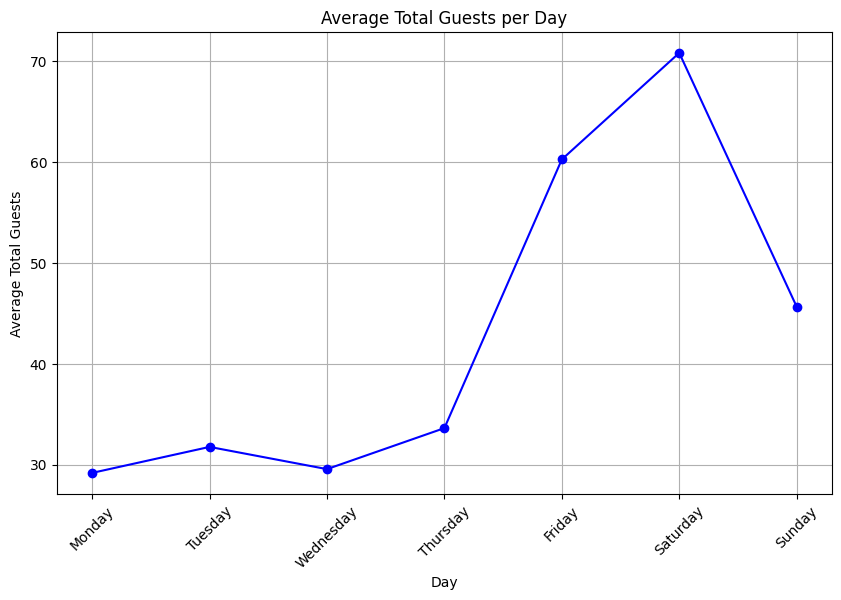

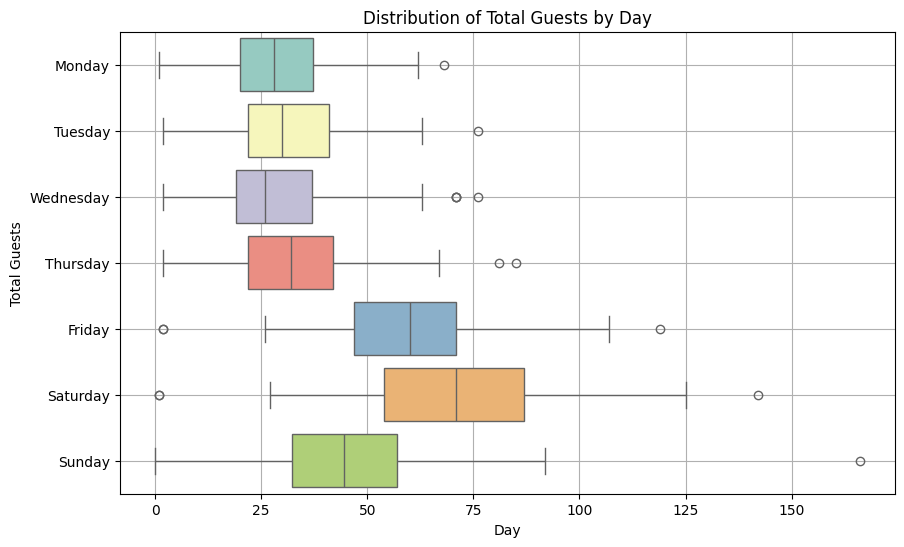

In [250]:
# Define the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to categorical data type with the defined order
dfTortillas['Day'] = pd.Categorical(dfTortillas['Day'], categories=day_order, ordered=True)

# Calculate the average total guests for each day
avg_total_guests_per_day = dfTortillas.groupby('Day', observed=False)['Total guests'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
avg_total_guests_per_day.plot(marker='o', color='b', linestyle='-')
plt.title('Average Total Guests per Day')
plt.xlabel('Day')
plt.ylabel('Average Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total guests', y='Day', data=dfTortillas, hue='Day', palette='Set3', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Day')
plt.xlabel('Day')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

You can observe that the day significantly influences the number of guests. The restaurant opens at 2 pm on weekends but at 5 pm on weekdays. Additionally, Fridays are particularly busy as they mark the beginning of the weekend.

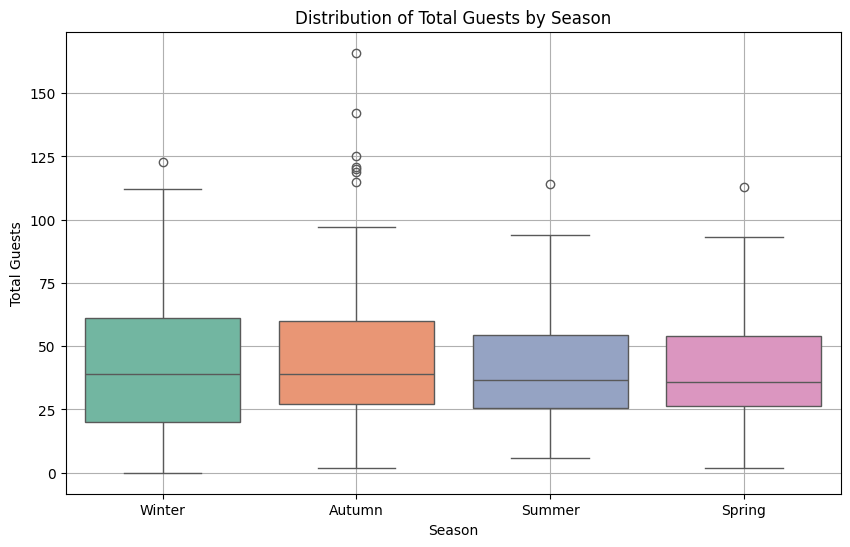

In [251]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Total guests', data=dfTortillas, hue='Season', palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Season')
plt.xlabel('Season')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

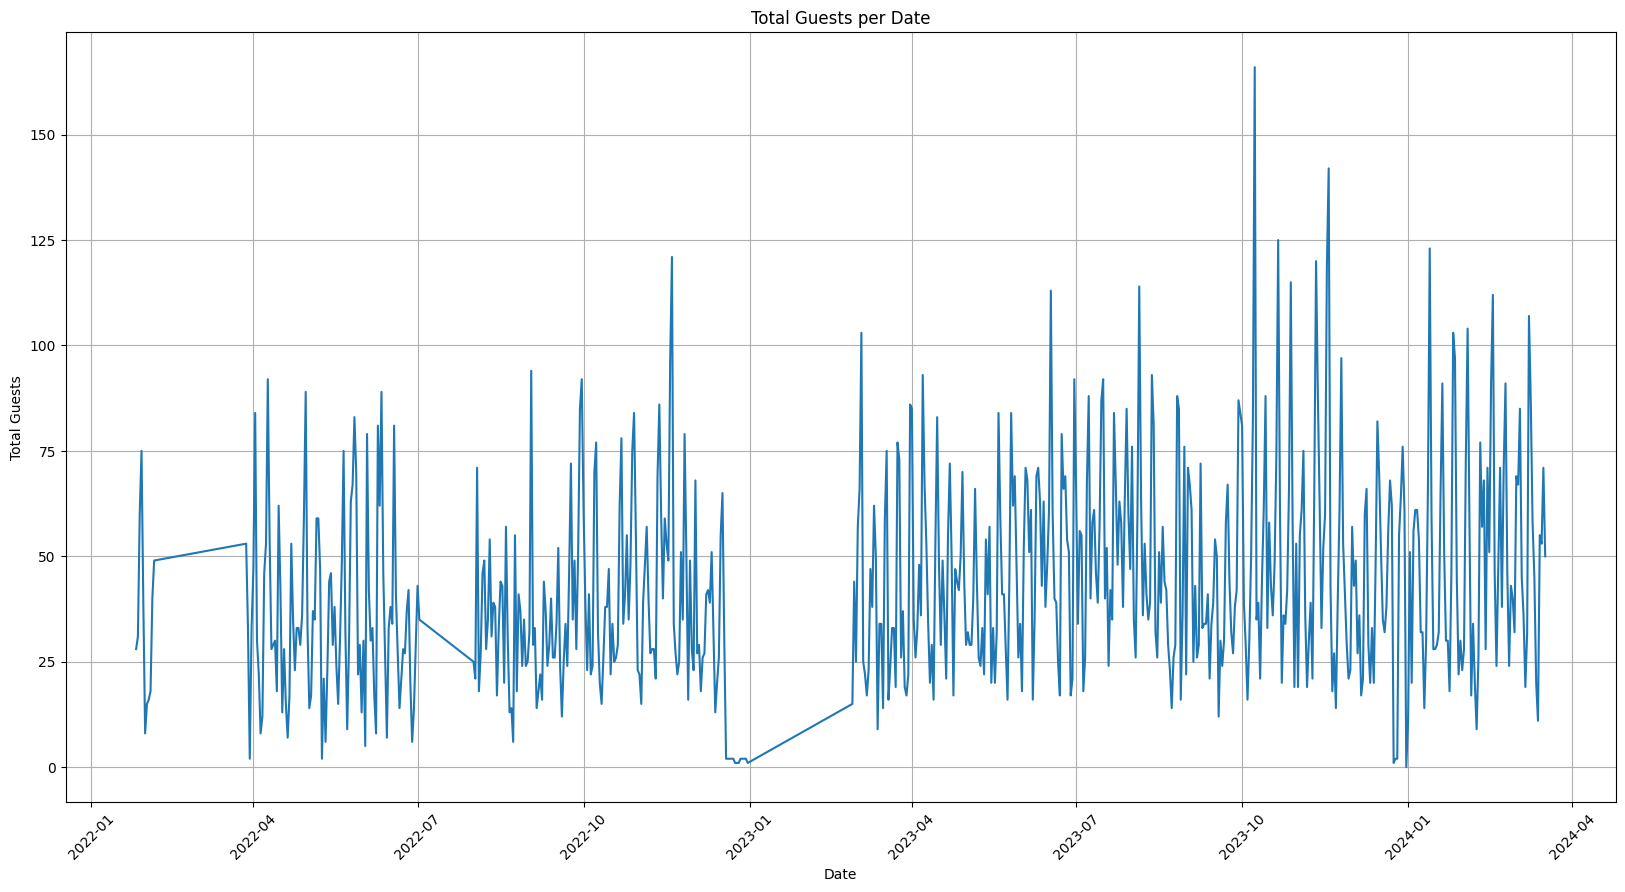

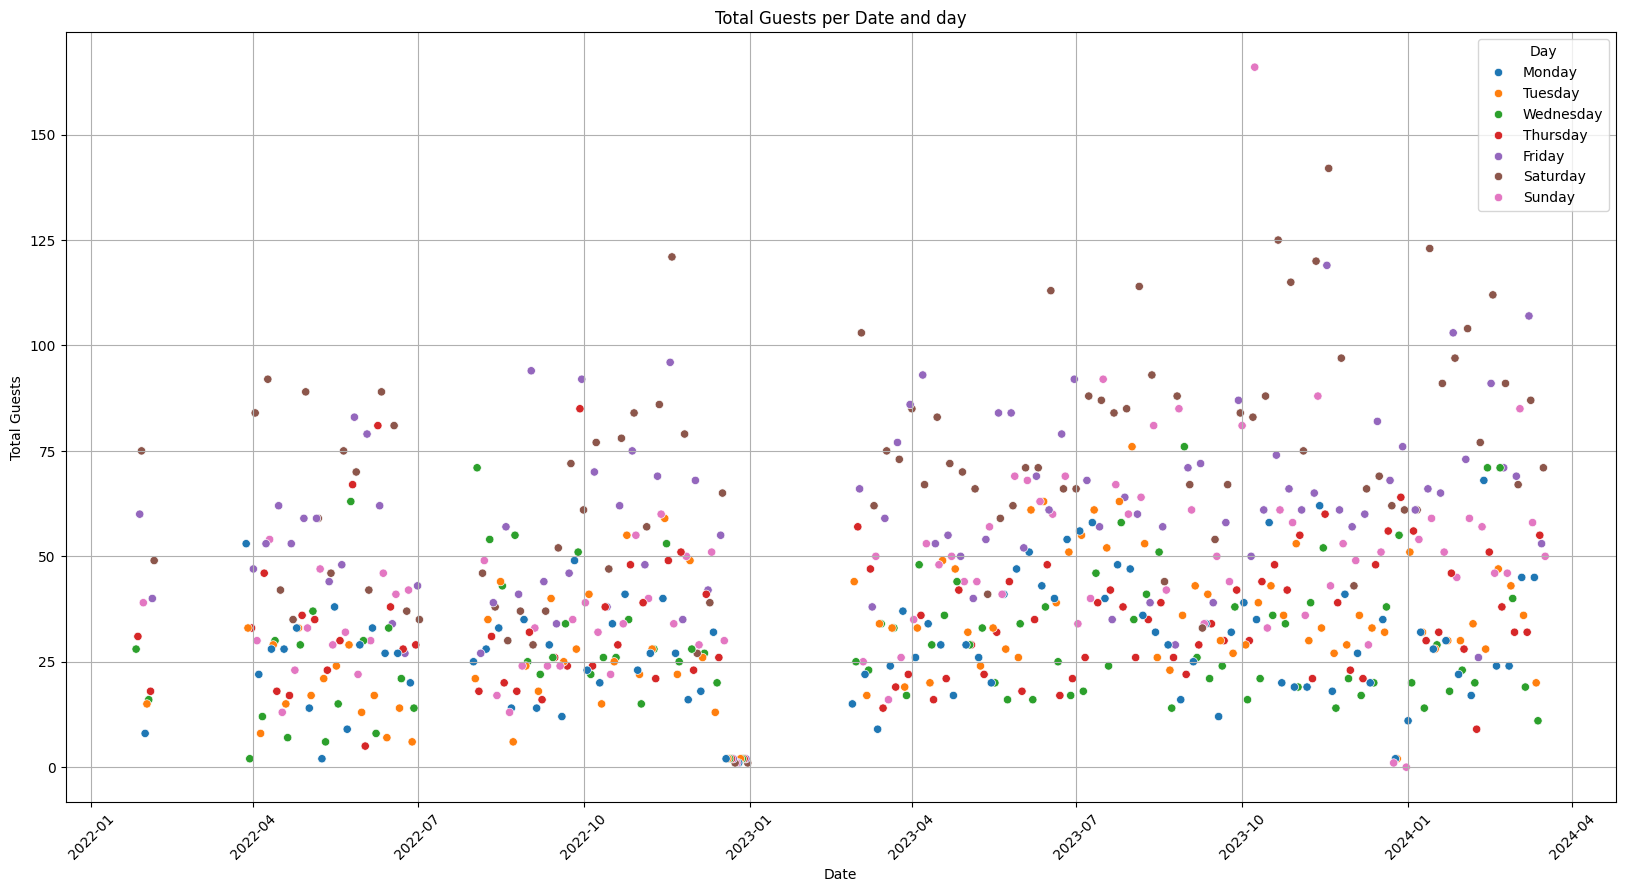

In [252]:
# Make a line plot foreach date of how many guest there were
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Total guests', data=dfTortillas)
plt.title('Total Guests per Date')
plt.xlabel('Date')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter plot
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Date', y='Total guests', data=dfTortillas, hue='Day')
plt.title('Total Guests per Date and day')
plt.xlabel('Date')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The graph is going up and down all over the place and the scatter matrix as well. However if you look closely, you can see some patterns exists.

Now we'll have a look at the Weather data.

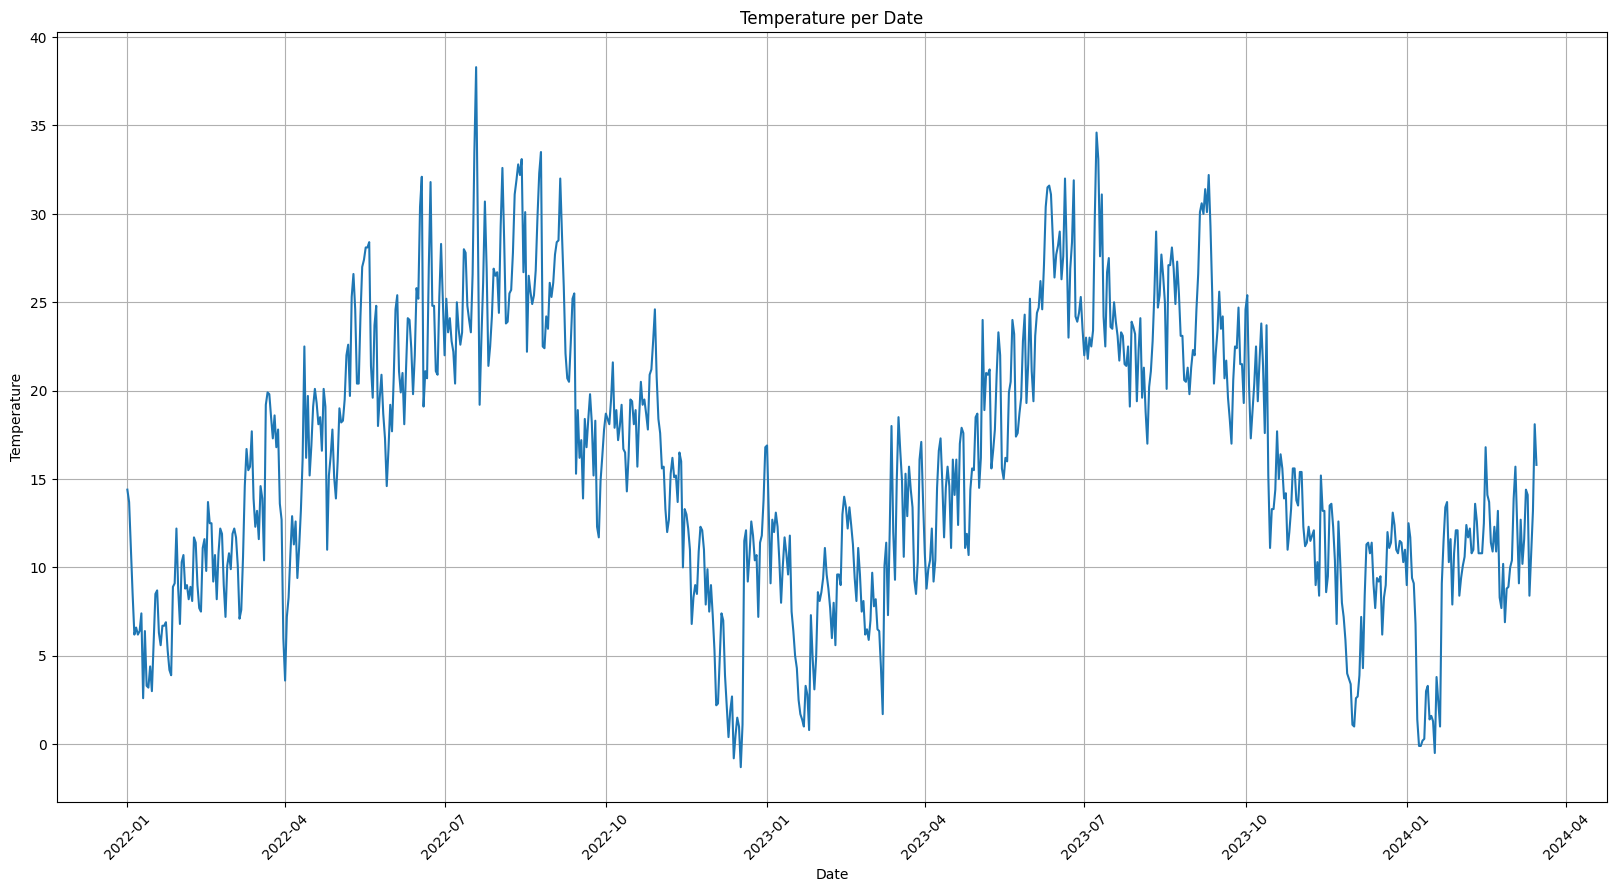

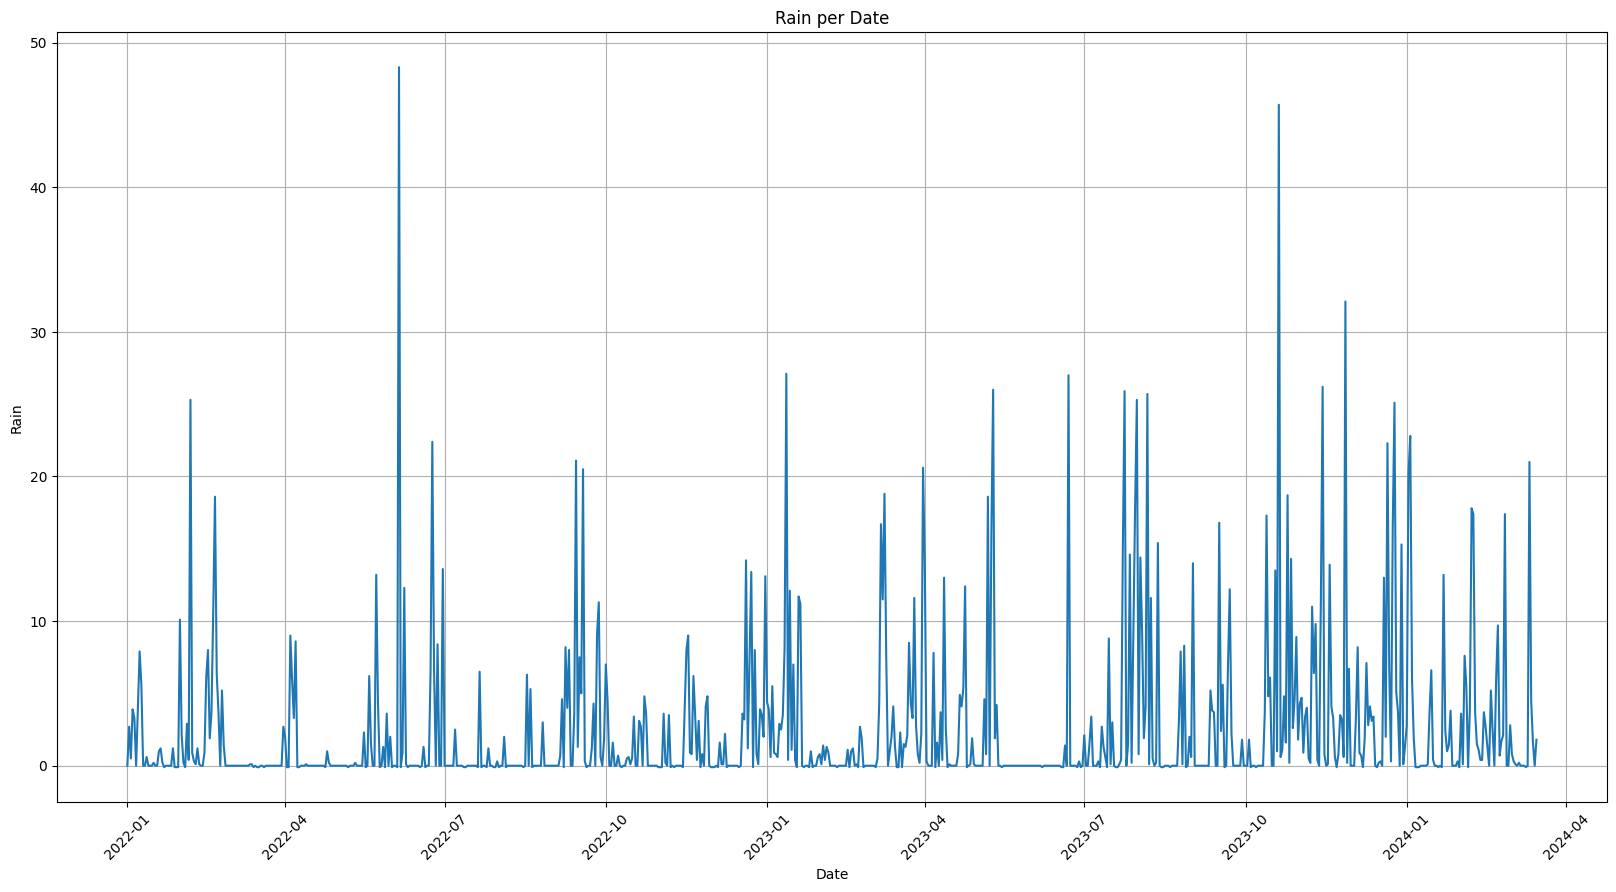

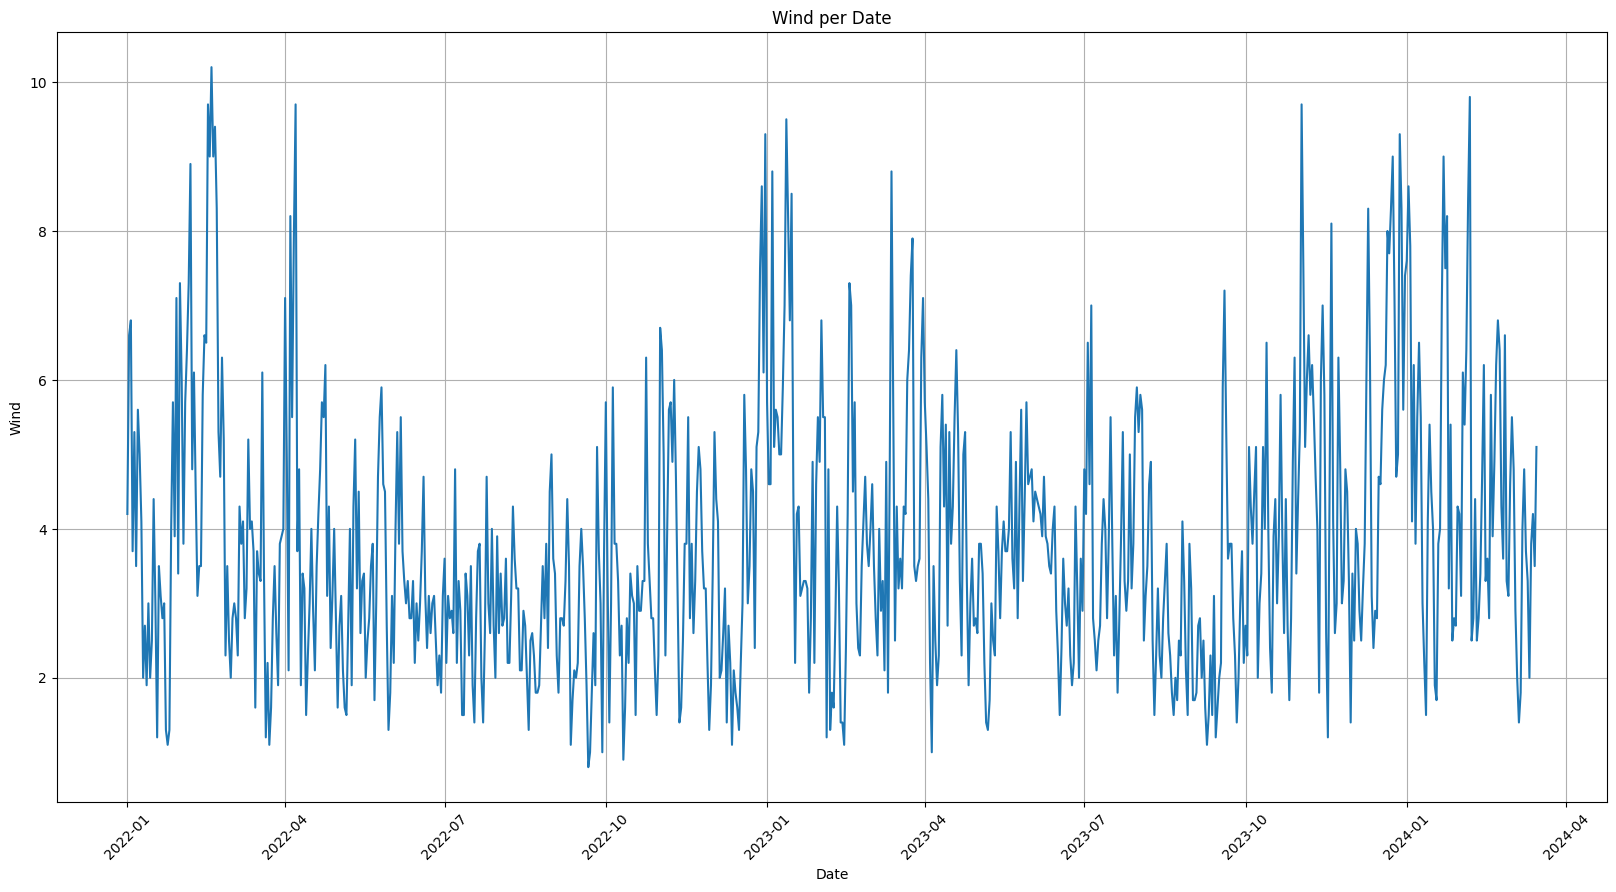

In [253]:
# Visualize temperature across the year per date
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Temperature', data=dfWeather_selected)
plt.title('Temperature per Date')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualize rain across the year per date
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Rain', data=dfWeather_selected)
plt.title('Rain per Date')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualize wind across the year per date
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Wind', data=dfWeather_selected)
plt.title('Wind per Date')
plt.xlabel('Date')
plt.ylabel('Wind')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Clearly, you can see a pattern (clusters) in the temperature plot, logically it's warmer during the summer period then the winter period. You can see that as well in the graph.

I'll merge the dataset with the Tortillas dataframe to see if there are any patterns in there.

In [254]:
# Create a new dataframe for weather and tortillas combined
dfCombined = dfTortillas.merge(dfWeather_selected, how='inner', left_on='Date', right_on='Date')

dfCombined.head()

,Date,Day,Season,Total guests,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,TImezone max wind
0,2024-03-15,Friday,Winter,53.0,15.8,1.8,1.0,0.7,17,5.1,13
1,2024-03-14,Thursday,Winter,55.0,18.1,0.0,0.0,0.0,1,3.5,11
2,2024-03-13,Wednesday,Winter,11.0,13.2,1.6,3.7,0.5,6,4.2,15
3,2024-03-12,Tuesday,Winter,20.0,10.8,4.5,9.8,0.8,19,3.8,11
4,2024-03-11,Monday,Winter,45.0,8.4,21.0,18.8,3.3,13,2.0,10


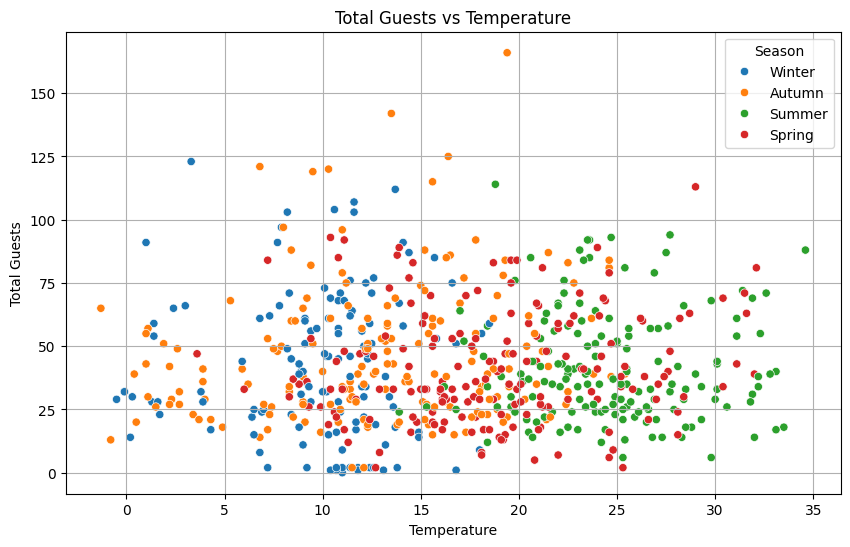

In [255]:
# Make scatter plot for temperature and total guests
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Total guests', data=dfCombined, hue='Season')
plt.title('Total Guests vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

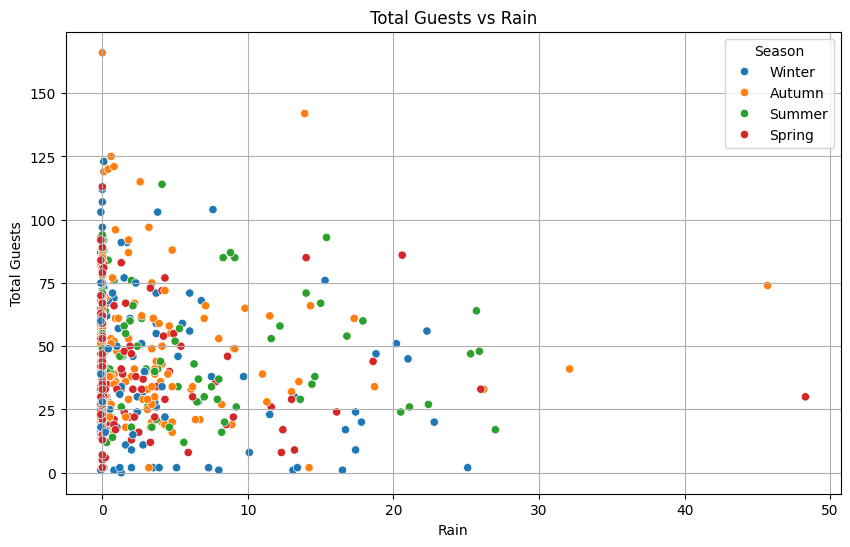

In [256]:
# Visualize total guests and rain
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rain', y='Total guests', data=dfCombined, hue='Season')
plt.title('Total Guests vs Rain')
plt.xlabel('Rain')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

You can see, there is a weak negative correlation between rain and total guests.

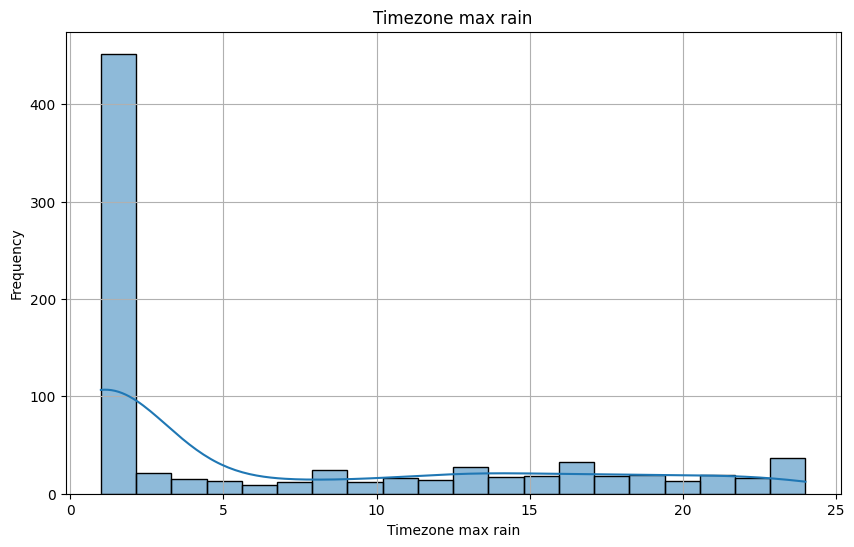

In [257]:
# Make histogram of timezone max rain
plt.figure(figsize=(10, 6))
sns.histplot(dfWeather_selected['Timezone max rain'], bins=20, kde=True)
plt.title('Timezone max rain')
plt.xlabel('Timezone max rain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The problem with this histogram is that when there is no rain, the timezone is automatically set to 1. So to fix that, make a copy of the dataframe and remove the rows containing 0 rain.

In [258]:
# Make copy  of weather df
dfWeather_selected_copy = dfWeather_selected.copy()

# Remove rows with Max rain =< 0
dfWeather_selected_copy = dfWeather_selected_copy[dfWeather_selected_copy['Max rain'] > 0]

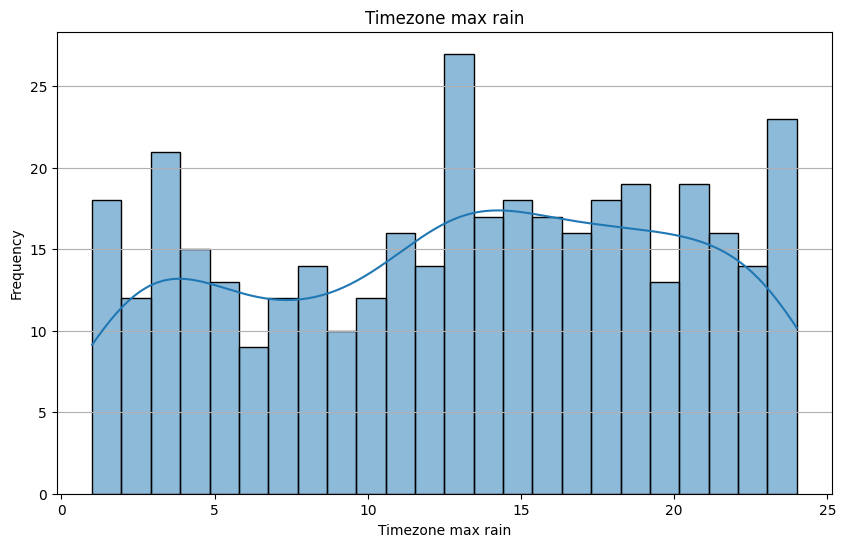

In [259]:
# Make histogram of timezone max rain
plt.figure(figsize=(10, 6))
sns.histplot(dfWeather_selected_copy['Timezone max rain'], bins=24, kde=True)
plt.title('Timezone max rain')
plt.xlabel('Timezone max rain')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

You can see that from 12am - 9pm there is a high curve.

To understand the functionality of the data, we initially need to consolidate it by merging relevant datasets. Once combined, we can explore potential correlations within the data. To facilitate this exploration, I've introduced a new column indicating the count of PSV matches and Effenaar concerts held on each respective day. This approach allows us to analyze any potential relationships or patterns between the occurrence of these events and other variables within the dataset.

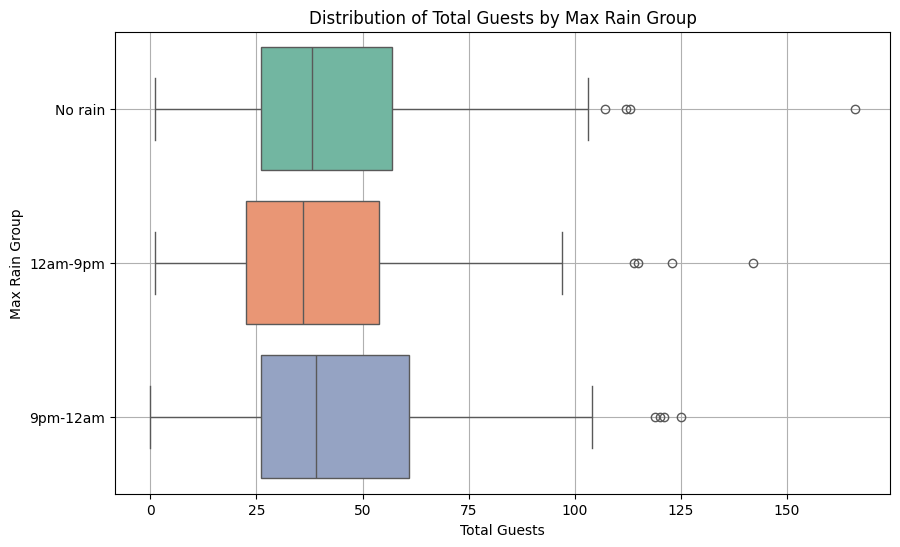

In [260]:
# Divide max rain into 3 groups, no rain, 12am-9pm, 9pm-12am
dfCombined.loc[dfCombined['Max rain'] <= 0, 'Max rain group'] = 'No rain'
dfCombined.loc[(dfCombined['Max rain'] > 0) & (dfCombined['Timezone max rain'] >= 12) & (dfCombined['Timezone max rain'] <= 21), 'Max rain group'] = '12am-9pm'
dfCombined.loc[(dfCombined['Max rain'] > 0) & ((dfCombined['Timezone max rain'] > 21) | (dfCombined['Timezone max rain'] < 12)), 'Max rain group'] = '9pm-12am'

# Sort them
dfCombined['Max rain group'] = pd.Categorical(dfCombined['Max rain group'], categories=['No rain', '12am-9pm', '9pm-12am'], ordered=True)

# Visualize Max rain group and total guests
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total guests', y='Max rain group', data=dfCombined, hue='Max rain group', palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Max Rain Group')
plt.xlabel('Total Guests')
plt.ylabel('Max Rain Group')
plt.grid(True)
plt.show()

In [261]:
# Print the amount of rows foreach category
print(dfCombined['Max rain group'].value_counts())

Max rain group
No rain     422
9pm-12am    205
12am-9pm    178
Name: count, dtype: int64


In [262]:
print(dfCombined.head(200).to_string())

          Date        Day  Season  Total guests  Temperature  Rain  Duration rain  Max rain  Timezone max rain  Wind  TImezone max wind Max rain group
0   2024-03-15     Friday  Winter          53.0         15.8   1.8            1.0       0.7                 17   5.1                 13       12am-9pm
1   2024-03-14   Thursday  Winter          55.0         18.1   0.0            0.0       0.0                  1   3.5                 11        No rain
2   2024-03-13  Wednesday  Winter          11.0         13.2   1.6            3.7       0.5                  6   4.2                 15       9pm-12am
3   2024-03-12    Tuesday  Winter          20.0         10.8   4.5            9.8       0.8                 19   3.8                 11       12am-9pm
4   2024-03-11     Monday  Winter          45.0          8.4  21.0           18.8       3.3                 13   2.0                 10       12am-9pm
5   2024-03-10     Sunday  Winter          58.0         14.1   0.0            0.0       0.0   

There are multiple outliers for the amount of guests for "No rain" and "12

You can observe that it's nearly evenly divided. We might explore whether timezones have any influence. Let's categorize it into three groups: periods with no rain, rain occurring from 4 pm to 10 pm (inclusive of opening and closing times), and rain outside of those hours.

In [263]:
# Convert 'Date' column to datetime format for other DataFrames
dfTortillas['Date'] = pd.to_datetime(dfTortillas['Date'])
dfPsv['Date'] = pd.to_datetime(dfPsv['Date'])
dfEffenaar['Date'] = pd.to_datetime(dfEffenaar['Date'])

# Count the number of events for each date in dfPsv and dfEffenaar
dfPsv_count = dfPsv.groupby('Date').size().reset_index(name='PSV_Count')
dfEffenaar_count = dfEffenaar.groupby('Date').size().reset_index(name='Effenaar_Count')

# Merge the counts with dfTortillas
combined_data = pd.merge(dfTortillas, dfPsv_count, on='Date', how='left')
finalDf = pd.merge(combined_data, dfEffenaar_count, on='Date', how='left')

# Merge dfWeather_selected with finalDf
finalDf = pd.merge(finalDf, dfWeather_selected, on='Date', how='left')

# Drop rows where any value is NaN
finalDf.dropna(inplace=True)

finalDf.head()

,Date,Day,Season,Total guests,PSV_Count,Effenaar_Count,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,TImezone max wind
14,2024-03-03,Sunday,Winter,85.0,1.0,1.0,15.7,0.1,0.3,0.1,9.0,2.9,19.0
30,2024-02-16,Friday,Winter,91.0,1.0,1.0,14.1,1.3,1.7,0.4,13.0,3.6,10.0
50,2024-01-27,Saturday,Winter,97.0,1.0,1.0,7.9,0.0,0.0,0.0,1.0,2.5,13.0
64,2024-01-13,Saturday,Winter,123.0,1.0,2.0,3.3,0.1,0.3,0.1,18.0,4.1,21.0
87,2023-12-21,Thursday,Winter,56.0,1.0,1.0,12.0,22.3,11.9,8.1,20.0,8.0,12.0


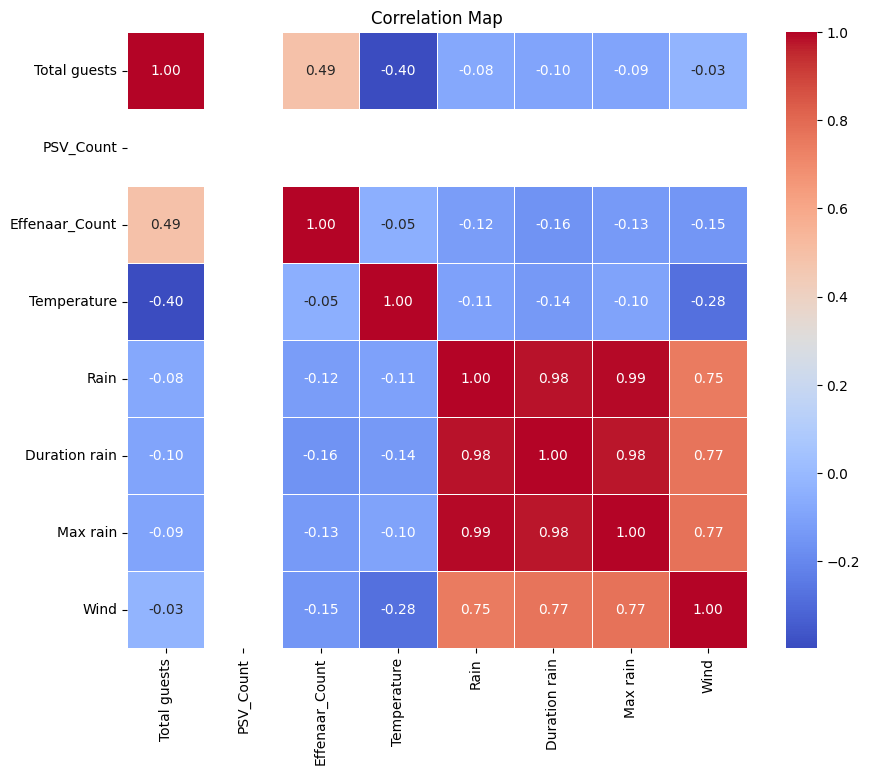

In [264]:
# Combine the relevant columns into a new DataFrame for correlation analysis
correlation_df = finalDf[['Total guests', 'PSV_Count', 'Effenaar_Count', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Wind']]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

Upon examining the correlation map, we observe significant influences when PSV plays or if there's a concert at the Effenaar, both resulting in increased guest numbers. Additionally, a slight increase in guests is noticed with rising temperatures, although further data across the four seasons is necessary to confirm this trend. Conversely, rain negatively impacts guest numbers, whereas wind shows minimal effect on attendance.

The day of the week significantly impacts the flow of visitors, with Saturdays emerging as the busiest, closely followed by Fridays. Sundays also tend to be bustling, albeit to a lesser extent. Conversely, weekdays witness noticeably fewer patrons, marking a quieter period for business.

### Data Preparation